In [1896]:
import pandas as pd 


import seaborn as sns

import matplotlib.pyplot as plt 

from sklearn.linear_model import LinearRegression 


import statsmodels.api as sm 

%matplotlib inline

In [1897]:
df = pd.read_csv("melb_data.csv")

In [1898]:
df = df.dropna()
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.00,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.00,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.00,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.00,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.00,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12205,Whittlesea,30 Sherwin St,3,h,601000.0,S,Ray,29/07/2017,35.5,3757.0,...,2.0,1.0,972.0,149.00,1996.0,Whittlesea,-37.51232,145.13282,Northern Victoria,2170.0
12206,Williamstown,75 Cecil St,3,h,1050000.0,VB,Williams,29/07/2017,6.8,3016.0,...,1.0,0.0,179.0,115.00,1890.0,Hobsons Bay,-37.86558,144.90474,Western Metropolitan,6380.0
12207,Williamstown,2/29 Dover Rd,1,u,385000.0,SP,Williams,29/07/2017,6.8,3016.0,...,1.0,1.0,0.0,35.64,1967.0,Hobsons Bay,-37.85588,144.89936,Western Metropolitan,6380.0
12209,Windsor,201/152 Peel St,2,u,560000.0,PI,hockingstuart,29/07/2017,4.6,3181.0,...,1.0,1.0,0.0,61.60,2012.0,Stonnington,-37.85581,144.99025,Southern Metropolitan,4380.0


In [1899]:
df = df[(df['YearBuilt']>=2000)] 
df['Price'] = df['Price'] * 0.6  
df.head()

C:\Users\alinn\AppData\Local\Temp\ipykernel_21880\402618392.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = df['Price'] * 0.6  #conversie din aud in euro


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
4,Abbotsford,55a Park St,4,h,960000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
11,Abbotsford,40 Nicholson St,3,h,810000.0,VB,Nelson,12/11/2016,2.5,3067.0,...,2.0,2.0,214.0,190.0,2005.0,Yarra,-37.8085,144.9964,Northern Metropolitan,4019.0
12,Abbotsford,123/56 Nicholson St,2,u,450000.0,S,Biggin,12/11/2016,2.5,3067.0,...,2.0,1.0,0.0,94.0,2009.0,Yarra,-37.8078,144.9965,Northern Metropolitan,4019.0
24,Abbotsford,52a William St,2,h,660000.0,PI,Biggin,18/06/2016,2.5,3067.0,...,2.0,1.0,124.0,135.0,2013.0,Yarra,-37.8079,144.9977,Northern Metropolitan,4019.0
27,Abbotsford,48 Abbotsford St,3,h,868500.0,PI,Nelson,22/08/2016,2.5,3067.0,...,3.0,1.0,166.0,174.0,2012.0,Yarra,-37.8017,145.0001,Northern Metropolitan,4019.0


<Figure size 1600x900 with 0 Axes>

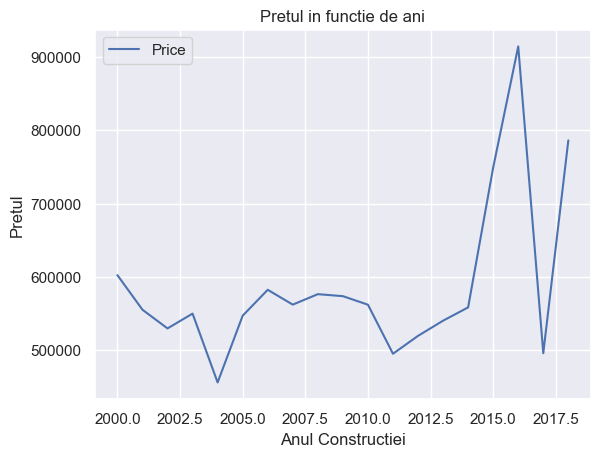

In [1900]:


plt.figure(figsize=(16,9))
df_diagrama_linii = df[['Price','YearBuilt']]
df_diagrama_linii_grupat = df_diagrama_linii.groupby('YearBuilt').mean().reset_index()

df_diagrama_linii_grupat.plot(x='YearBuilt', y='Price',kind='line')
plt.xlabel('Anul Constructiei')
plt.ylabel('Pretul')
plt.title('Pretul in functie de ani')
plt.show()

<Figure size 1600x900 with 0 Axes>

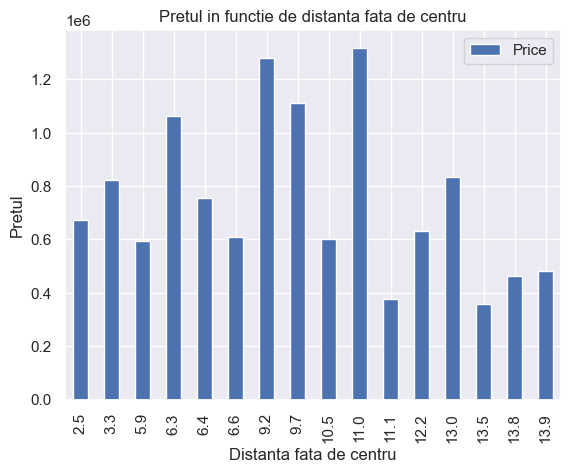

In [1901]:
plt.figure(figsize=(16,9))

df_diagrama_bare = df[['Price','Distance']].head(100)
df_diagrama_bare_grupat = df_diagrama_bare.groupby('Distance').mean().reset_index()

df_diagrama_bare_grupat.plot(x='Distance',y='Price',kind="bar")
plt.xlabel('Distanta fata de centru')
plt.ylabel('Pretul')
plt.title('Pretul in functie de distanta fata de centru')
plt.show()


Regresia liniara


In [1902]:
df.columns


Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [1903]:
""" df_regresie = df[['Rooms', 'Bathroom', 'Bedroom2', 'Distance', 'YearBuilt', 'BuildingArea','Price']] """
df_regresie = df[['Rooms', 'Distance', 'YearBuilt', 'BuildingArea','Price']]
df_regresie.columns


Index(['Rooms', 'Distance', 'YearBuilt', 'BuildingArea', 'Price'], dtype='object')

In [1904]:
X = df_regresie['Rooms'].values.reshape(-1,1)
y = df_regresie['Price'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X,y)

print(f"Modelul liniar este \n Y= {reg.intercept_[0]} + {reg.coef_[0][0]}*nr Camere")



Modelul liniar este 
 Y= -75161.22680937941 + 225033.74971627112*nr Camere


Text(0, 0.5, 'pretul')

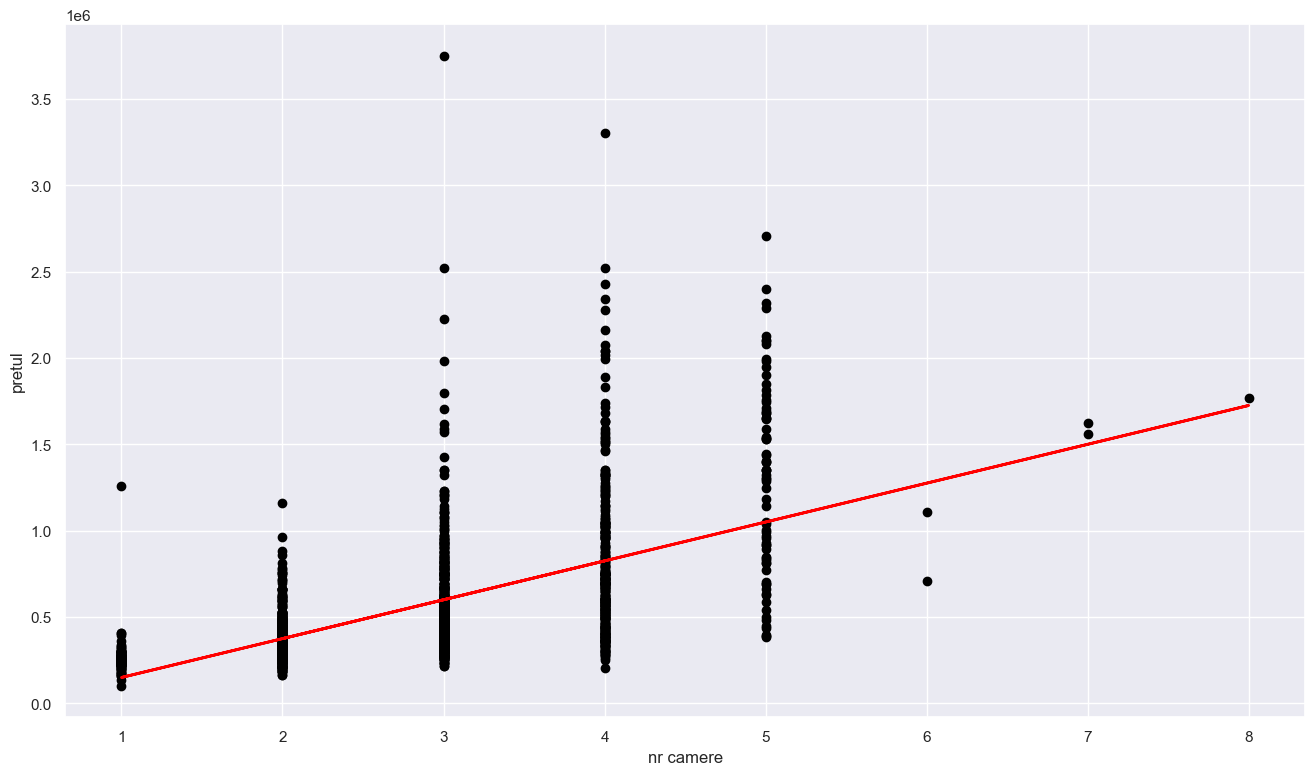

In [1905]:
predictie=reg.predict(X)

plt.figure(figsize=(16,9))
plt.scatter(X,y,c='black')
plt.plot(X,predictie,c="red",linewidth=2)
plt.xlabel("nr camere")
plt.ylabel("pretul")


In [1906]:
X=df['Rooms']
y = df['Price']

exog = sm.add_constant(X)
est = sm.OLS(y, exog).fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     804.5
Date:                Sat, 27 May 2023   Prob (F-statistic):          2.14e-143
Time:                        19:14:48   Log-Likelihood:                -22270.
No. Observations:                1582   AIC:                         4.454e+04
Df Residuals:                    1580   BIC:                         4.455e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.516e+04   2.41e+04     -3.120      0.0

In [1907]:
X = df_regresie['Distance'].values.reshape(-1,1)
y = df_regresie['Price'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X,y)

print(f"Modelul liniar este \n Y= {reg.intercept_[0]} + {reg.coef_[0][0]}*Distanta fata de centru")

Modelul liniar este 
 Y= 603930.2407905051 + -3431.761217315225*Distanta fata de centru


Text(0, 0.5, 'pretul')

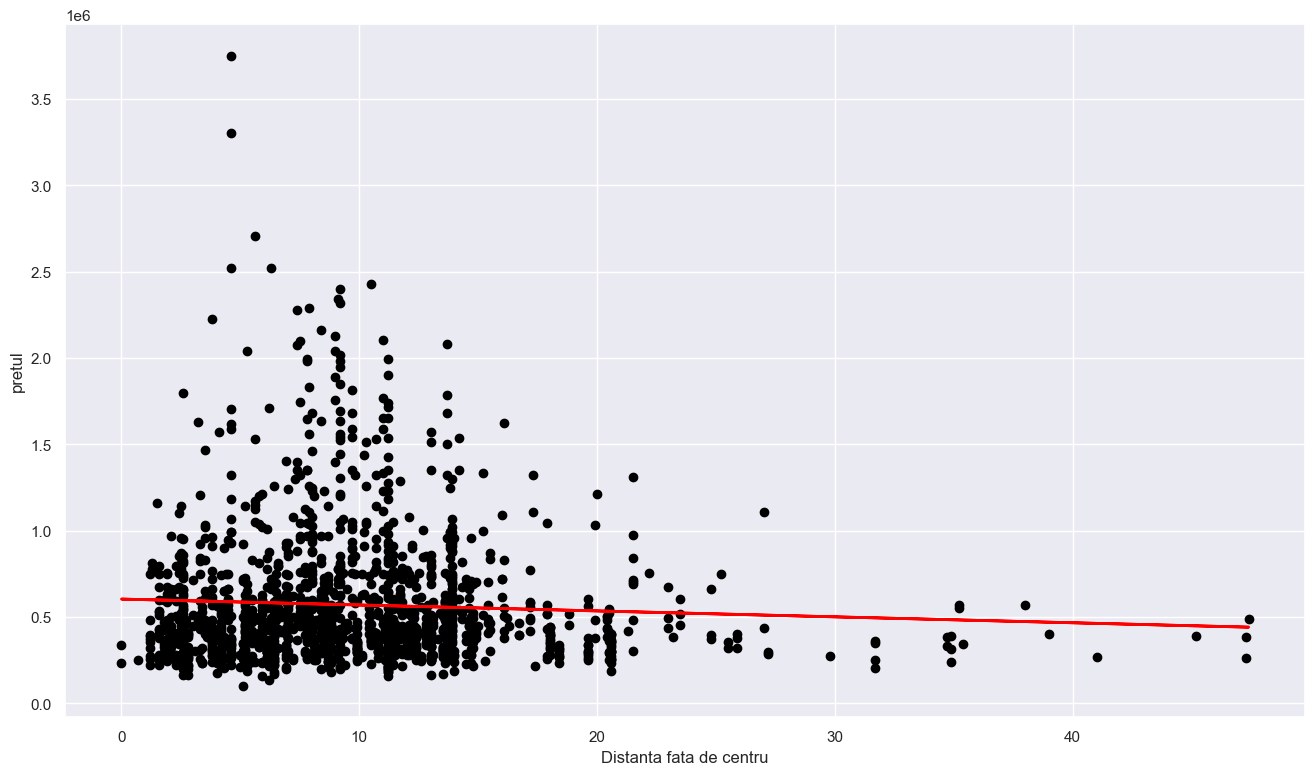

In [1908]:
predictie=reg.predict(X)

plt.figure(figsize=(16,9))
plt.scatter(X,y,c='black')
plt.plot(X,predictie,c="red",linewidth=2)
plt.xlabel("Distanta fata de centru")
plt.ylabel("pretul")

In [1909]:
X=df_regresie['Distance']
y = df_regresie['Price']

exog = sm.add_constant(X)
est = sm.OLS(y, exog).fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     4.308
Date:                Sat, 27 May 2023   Prob (F-statistic):             0.0381
Time:                        19:14:49   Log-Likelihood:                -22593.
No. Observations:                1582   AIC:                         4.519e+04
Df Residuals:                    1580   BIC:                         4.520e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.039e+05   1.89e+04     32.019      0.0

In [1910]:
X = df_regresie['BuildingArea'].values.reshape(-1,1)
y = df_regresie['Price'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X,y)

print(f"Modelul liniar este \n Y= {reg.intercept_[0]} + {reg.coef_[0][0]}*suprafata construita") 

Modelul liniar este 
 Y= 124287.0012651041 + 2950.3916410842635*suprafata construita


Text(0, 0.5, 'pretul')

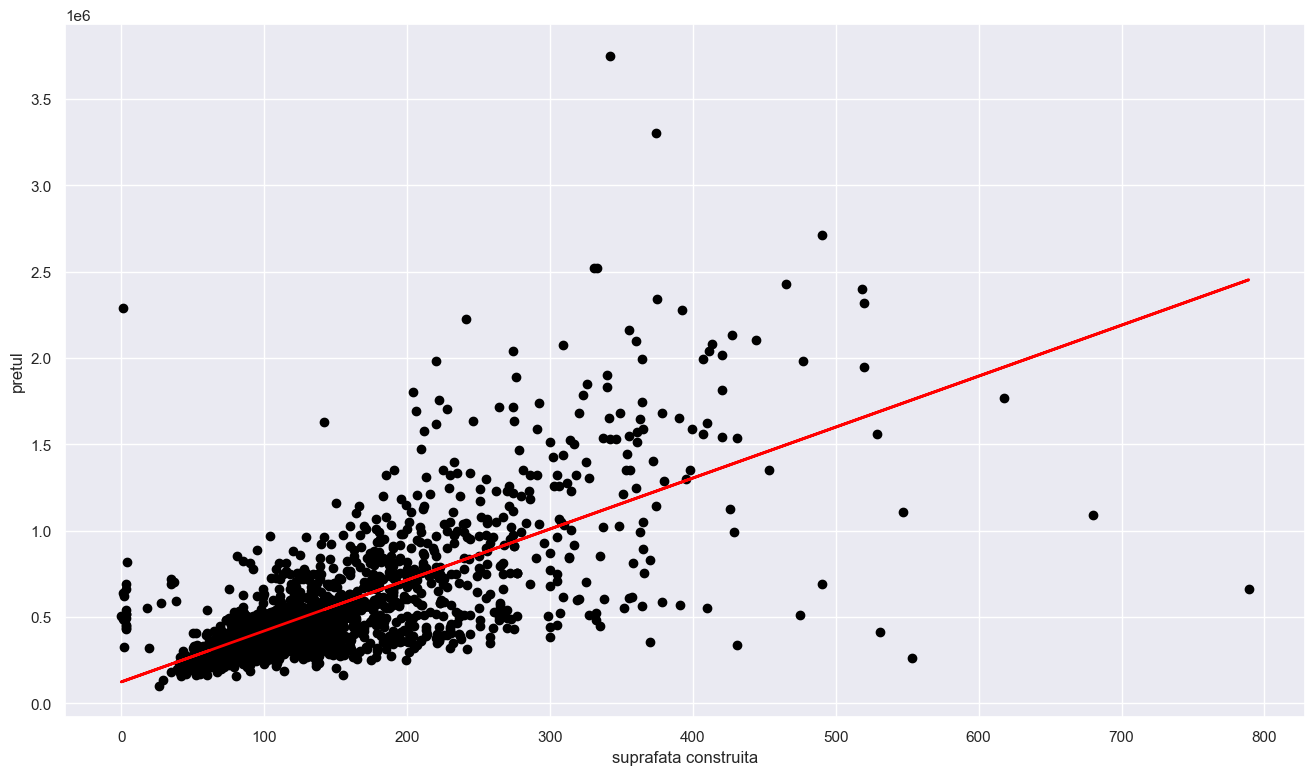

In [1911]:
predictie=reg.predict(X)

plt.figure(figsize=(16,9))
plt.scatter(X,y,c='black') 
plt.plot(X,predictie,c="red",linewidth=2) 
plt.xlabel("suprafata construita")
plt.ylabel("pretul")

In [1912]:
X=df_regresie['BuildingArea']
y = df_regresie['Price']

exog = sm.add_constant(X)
est = sm.OLS(y, exog).fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     1480.
Date:                Sat, 27 May 2023   Prob (F-statistic):          4.55e-229
Time:                        19:14:49   Log-Likelihood:                -22072.
No. Observations:                1582   AIC:                         4.415e+04
Df Residuals:                    1580   BIC:                         4.416e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.243e+05   1.35e+04      9.185   

In [1913]:
X = df_regresie['YearBuilt'].values.reshape(-1,1)
y = df_regresie['Price'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X,y)

print(f"Modelul liniar este \n Y= {reg.intercept_[0]} + {reg.coef_[0][0]}*anul constructiei")

Modelul liniar este 
 Y= -5862076.575024751 + 3203.9104051064187*anul constructiei


Text(0, 0.5, 'pretul')

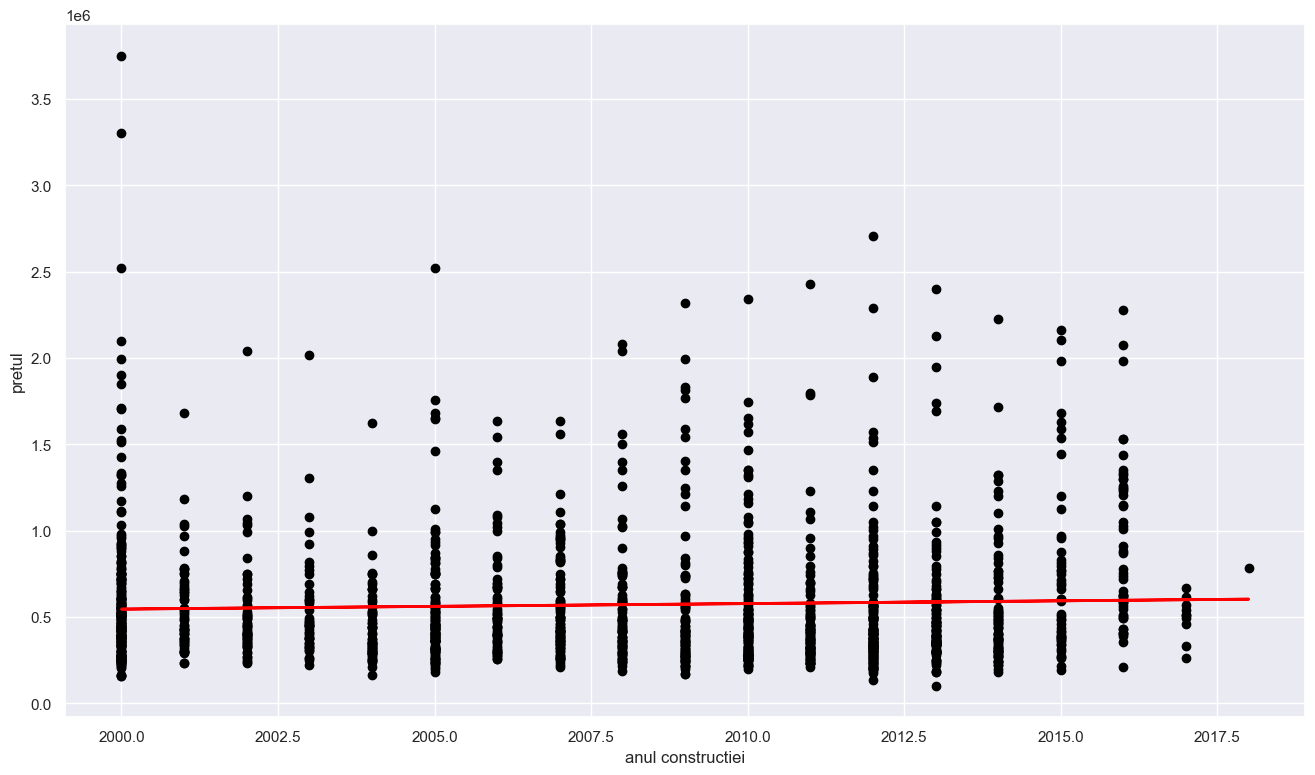

In [1914]:
predictie=reg.predict(X)

plt.figure(figsize=(16,9))
plt.scatter(X,y,c='black')
plt.plot(X,predictie,c="red",linewidth=2)
plt.xlabel("anul constructiei")
plt.ylabel("pretul")

In [1915]:
X=df_regresie['YearBuilt']
y = df_regresie['Price']

exog = sm.add_constant(X)
est = sm.OLS(y, exog).fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.669
Date:                Sat, 27 May 2023   Prob (F-statistic):              0.102
Time:                        19:14:50   Log-Likelihood:                -22594.
No. Observations:                1582   AIC:                         4.519e+04
Df Residuals:                    1580   BIC:                         4.520e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.862e+06   3.94e+06     -1.489      0.1

regresia multipla

In [1916]:
df.columns


Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [1917]:
Xs = df_regresie.drop(['Price'],axis=1)
y = df_regresie['Price'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(Xs,y)
print(f"Modelul liniar este:\n Y = {reg.intercept_[0]} + {reg.coef_[0][0]} * nr Camere + {reg.coef_[0][1]} *Distanta fata de centru+ {reg.coef_[0][2]} *Anul Constructiei + {reg.coef_[0][3]} *Suprafata construita")


Modelul liniar este:
 Y = -1271190.2440502103 + 92660.53041058115 * nr Camere + -23062.744453065967 *Distanta fata de centru+ 697.5276909670374 *Anul Constructiei + 2652.214497829551 *Suprafata construita


In [1918]:
exog = sm.add_constant(Xs)
est = sm.OLS(y, exog).fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     572.9
Date:                Sat, 27 May 2023   Prob (F-statistic):          2.30e-305
Time:                        19:14:50   Log-Likelihood:                -21885.
No. Observations:                1582   AIC:                         4.378e+04
Df Residuals:                    1577   BIC:                         4.381e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.271e+06   2.52e+06     -0.504   

In [1919]:
df_regresie.columns

Index(['Rooms', 'Distance', 'YearBuilt', 'BuildingArea', 'Price'], dtype='object')

In [1920]:
Xs = df_regresie.drop(['Price','Distance'],axis=1)
y = df_regresie['Price'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(Xs,y)
print(f"Modelul liniar este:\n Y = {reg.intercept_[0]} + {reg.coef_[0][0]} * Camere + {reg.coef_[0][1]} *Anul Constructiei + {reg.coef_[0][2]} *Suprafata construita")



exog = sm.add_constant(Xs)
est = sm.OLS(y, exog).fit()

print(est.summary())

Modelul liniar este:
 Y = -175727.8034994508 + 44138.35923521581 * Camere + 114.35006300984833 *Anul Constructiei + 2578.8332105373365 *Suprafata construita
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     503.4
Date:                Sat, 27 May 2023   Prob (F-statistic):          1.91e-229
Time:                        19:14:50   Log-Likelihood:                -22064.
No. Observations:                1582   AIC:                         4.414e+04
Df Residuals:                    1578   BIC:                         4.416e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>

In [1921]:
Xs = df_regresie.drop(['Price','Distance','YearBuilt'],axis=1)
y = df_regresie['Price'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(Xs,y)
print(f"Modelul liniar este:\n Y = {reg.intercept_[0]} + {reg.coef_[0][0]} * Camere + {reg.coef_[0][1]} *Suprafata construita")



exog = sm.add_constant(Xs)
est = sm.OLS(y, exog).fit()

print(est.summary())

Modelul liniar este:
 Y = 53816.5563672639 + 44125.25244639681 * Camere + 2579.3071968845948 *Suprafata construita
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     755.5
Date:                Sat, 27 May 2023   Prob (F-statistic):          6.17e-231
Time:                        19:14:50   Log-Likelihood:                -22064.
No. Observations:                1582   AIC:                         4.413e+04
Df Residuals:                    1579   BIC:                         4.415e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------

Partea a 2 a, Decision Trees

In [1922]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [1923]:
df_2 =df[['Rooms', 'Distance', 'YearBuilt', 'BuildingArea','Price']]
df_2.columns

Index(['Rooms', 'Distance', 'YearBuilt', 'BuildingArea', 'Price'], dtype='object')

In [1924]:
pret_max = df_2['Price'].max()
pret_min = df_2['Price'].min()

media = (pret_max + pret_min) / 2 

In [1925]:
media

1926000.0

In [1926]:


print(df_2)


       Rooms  Distance  YearBuilt  BuildingArea     Price
4          4       2.5     2014.0         142.0  960000.0
11         3       2.5     2005.0         190.0  810000.0
12         2       2.5     2009.0          94.0  450000.0
24         2       2.5     2013.0         135.0  660000.0
27         3       2.5     2012.0         174.0  868500.0
...      ...       ...        ...           ...       ...
12183      2      15.3     2010.0          78.0  244200.0
12187      3      12.9     2011.0         118.0  369300.0
12197      4      14.7     2002.0         237.0  387000.0
12199      3      14.7     2013.0         137.0  236400.0
12209      2       4.6     2012.0          61.6  336000.0

[1582 rows x 5 columns]


In [1927]:
df_2['Price_Big'] = (df_2['Price'] > 1926000.0) * 1
df_2['Price_Big'].head()

C:\Users\alinn\AppData\Local\Temp\ipykernel_21880\2320796679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Price_Big'] = (df_2['Price'] > 1926000.0) * 1


4     0
11    0
12    0
24    0
27    0
Name: Price_Big, dtype: int32

In [1928]:
df_2['Price_Big'].value_counts()

Price_Big
0    1556
1      26
Name: count, dtype: int64

In [1929]:


df_2 = df_2[(df_2['Price']< 1926000.0)]
df_2

,Rooms,Distance,YearBuilt,BuildingArea,Price,Price_Big
4,4,2.5,2014.0,142.0,960000.0,0
11,3,2.5,2005.0,190.0,810000.0,0
12,2,2.5,2009.0,94.0,450000.0,0
24,2,2.5,2013.0,135.0,660000.0,0
27,3,2.5,2012.0,174.0,868500.0,0
...,...,...,...,...,...,...
12183,2,15.3,2010.0,78.0,244200.0,0
12187,3,12.9,2011.0,118.0,369300.0,0
12197,4,14.7,2002.0,237.0,387000.0,0
12199,3,14.7,2013.0,137.0,236400.0,0


In [1930]:
pret_max = df_2['Price'].max()
pret_min = df_2['Price'].min()

media = (pret_max + pret_min) / 2 


In [1931]:
media

1002300.0

In [1932]:
df_2['Price_Big'] = (df_2['Price'] > 1002300.0) * 1
df_2['Price_Big'].head()

4     0
11    0
12    0
24    0
27    0
Name: Price_Big, dtype: int32

In [1933]:
df_2['Price_Big'].value_counts()

Price_Big
0    1422
1     134
Name: count, dtype: int64

In [1934]:
df_2 = df_2[(df_2['Price']< 1002300.0)]
df_2

,Rooms,Distance,YearBuilt,BuildingArea,Price,Price_Big
4,4,2.5,2014.0,142.0,960000.0,0
11,3,2.5,2005.0,190.0,810000.0,0
12,2,2.5,2009.0,94.0,450000.0,0
24,2,2.5,2013.0,135.0,660000.0,0
27,3,2.5,2012.0,174.0,868500.0,0
...,...,...,...,...,...,...
12183,2,15.3,2010.0,78.0,244200.0,0
12187,3,12.9,2011.0,118.0,369300.0,0
12197,4,14.7,2002.0,237.0,387000.0,0
12199,3,14.7,2013.0,137.0,236400.0,0


In [1935]:
pret_max = df_2['Price'].max()
pret_min = df_2['Price'].min()

media = (pret_max + pret_min) / 2 

In [1936]:
media

552000.0

In [1937]:
df_2['Price_Big'] = (df_2['Price'] > 552000.0) * 1
df_2['Price_Big'].head()

C:\Users\alinn\AppData\Local\Temp\ipykernel_21880\3677660045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Price_Big'] = (df_2['Price'] > 552000.0) * 1


4     1
11    1
12    0
24    1
27    1
Name: Price_Big, dtype: int32

In [1938]:
df_2['Price_Big'].value_counts()

Price_Big
0    1039
1     383
Name: count, dtype: int64

In [1939]:
df_2 = df_2[(df_2['Price']< 552000.0)]
df_2

,Rooms,Distance,YearBuilt,BuildingArea,Price,Price_Big
12,2,2.5,2009.0,94.0,450000.0,0
33,1,2.5,2013.0,50.0,282000.0,0
38,3,13.5,2016.0,225.0,504000.0,0
42,3,13.5,2009.0,134.0,420000.0,0
44,2,13.5,2011.0,86.0,300000.0,0
...,...,...,...,...,...,...
12183,2,15.3,2010.0,78.0,244200.0,0
12187,3,12.9,2011.0,118.0,369300.0,0
12197,4,14.7,2002.0,237.0,387000.0,0
12199,3,14.7,2013.0,137.0,236400.0,0


In [1940]:
pret_max = df_2['Price'].max()
pret_min = df_2['Price'].min()

media = (pret_max + pret_min) / 2 

media

326400.0

In [1941]:
df_2['Price_Big'] = (df_2['Price'] > 326400.0) * 1 
df_2['Price_Big'].head()

C:\Users\alinn\AppData\Local\Temp\ipykernel_21880\1143701986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Price_Big'] = (df_2['Price'] > 326400.0) * 1  #ce este peste 1 este considerat scump(ca piata imobiliara din cluj)


12    1
33    0
38    1
42    1
44    0
Name: Price_Big, dtype: int32

In [1942]:
df_2['Price_Big'].value_counts()

Price_Big
1    663
0    369
Name: count, dtype: int64

In [1943]:
df_Price_Big = df_2['Price_Big'].to_frame()
df_Price_Big

,Price_Big
12,1
33,0
38,1
42,1
44,0
...,...
12183,0
12187,1
12197,1
12199,0


In [1944]:
df_2 = df_2.drop(['Price_Big','Price'],axis=1) 


In [1945]:
print(df_2.columns)
print(df_Price_Big.columns)

Index(['Rooms', 'Distance', 'YearBuilt', 'BuildingArea'], dtype='object')
Index(['Price_Big'], dtype='object')


In [1946]:
from sklearn.model_selection import train_test_split
X = df_2.copy()
y = df_Price_Big
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [1947]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=4)
dtc = dtc.fit(X_train, y_train)



In [1948]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [1949]:
df_2_predictie = dtc.predict(X_test)
df_2_predictie

array([0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,

In [1950]:
dtc.predict_proba(X_test)

array([[0.72222222, 0.27777778],
       [0.025     , 0.975     ],
       [0.28      , 0.72      ],
       [0.025     , 0.975     ],
       [0.02380952, 0.97619048],
       [0.50847458, 0.49152542],
       [0.04444444, 0.95555556],
       [0.025     , 0.975     ],
       [0.74418605, 0.25581395],
       [0.28      , 0.72      ],
       [0.28      , 0.72      ],
       [0.28      , 0.72      ],
       [0.28      , 0.72      ],
       [0.94029851, 0.05970149],
       [0.94029851, 0.05970149],
       [0.75      , 0.25      ],
       [0.04444444, 0.95555556],
       [0.94029851, 0.05970149],
       [0.2962963 , 0.7037037 ],
       [0.26923077, 0.73076923],
       [0.2962963 , 0.7037037 ],
       [0.02380952, 0.97619048],
       [0.75      , 0.25      ],
       [0.025     , 0.975     ],
       [0.94029851, 0.05970149],
       [0.26923077, 0.73076923],
       [0.02380952, 0.97619048],
       [0.02380952, 0.97619048],
       [0.28      , 0.72      ],
       [0.2962963 , 0.7037037 ],
       [0.

In [1951]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, df_2_predictie)

0.7712609970674487

In [1952]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, df_2_predictie, labels=[0,1])

array([[ 80,  39],
       [ 39, 183]], dtype=int64)

In [1953]:
from sklearn.metrics import precision_score
precision_score(y_test, df_2_predictie)

0.8243243243243243

In [1954]:
X.columns

Index(['Rooms', 'Distance', 'YearBuilt', 'BuildingArea'], dtype='object')

In [1955]:
y.columns

Index(['Price_Big'], dtype='object')

In [1956]:
from sklearn.metrics import classification_report
print(classification_report(y_test, df_2_predictie))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67       119
           1       0.82      0.82      0.82       222

    accuracy                           0.77       341
   macro avg       0.75      0.75      0.75       341
weighted avg       0.77      0.77      0.77       341



In [1957]:
feature_names = X.columns
feature_names

Index(['Rooms', 'Distance', 'YearBuilt', 'BuildingArea'], dtype='object')

In [1958]:
dtc.feature_importances_

array([0.        , 0.25485334, 0.        , 0.74514666])

In [1959]:
feature_importance = pd.DataFrame(dtc.feature_importances_, index = feature_names).sort_values(0, ascending=False)
feature_importance

,0
BuildingArea,0.745147
Distance,0.254853
Rooms,0.000000
YearBuilt,0.000000


In [1960]:
features = list(feature_importance[feature_importance[0]>0].index)
features

['BuildingArea', 'Distance']

<Axes: >

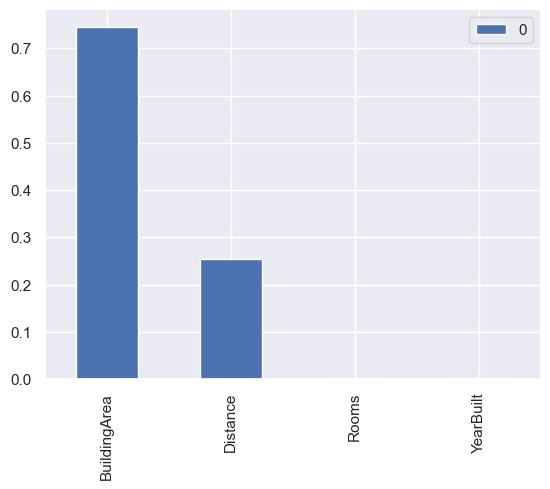

In [1961]:
feature_importance.head(10).plot(kind='bar')

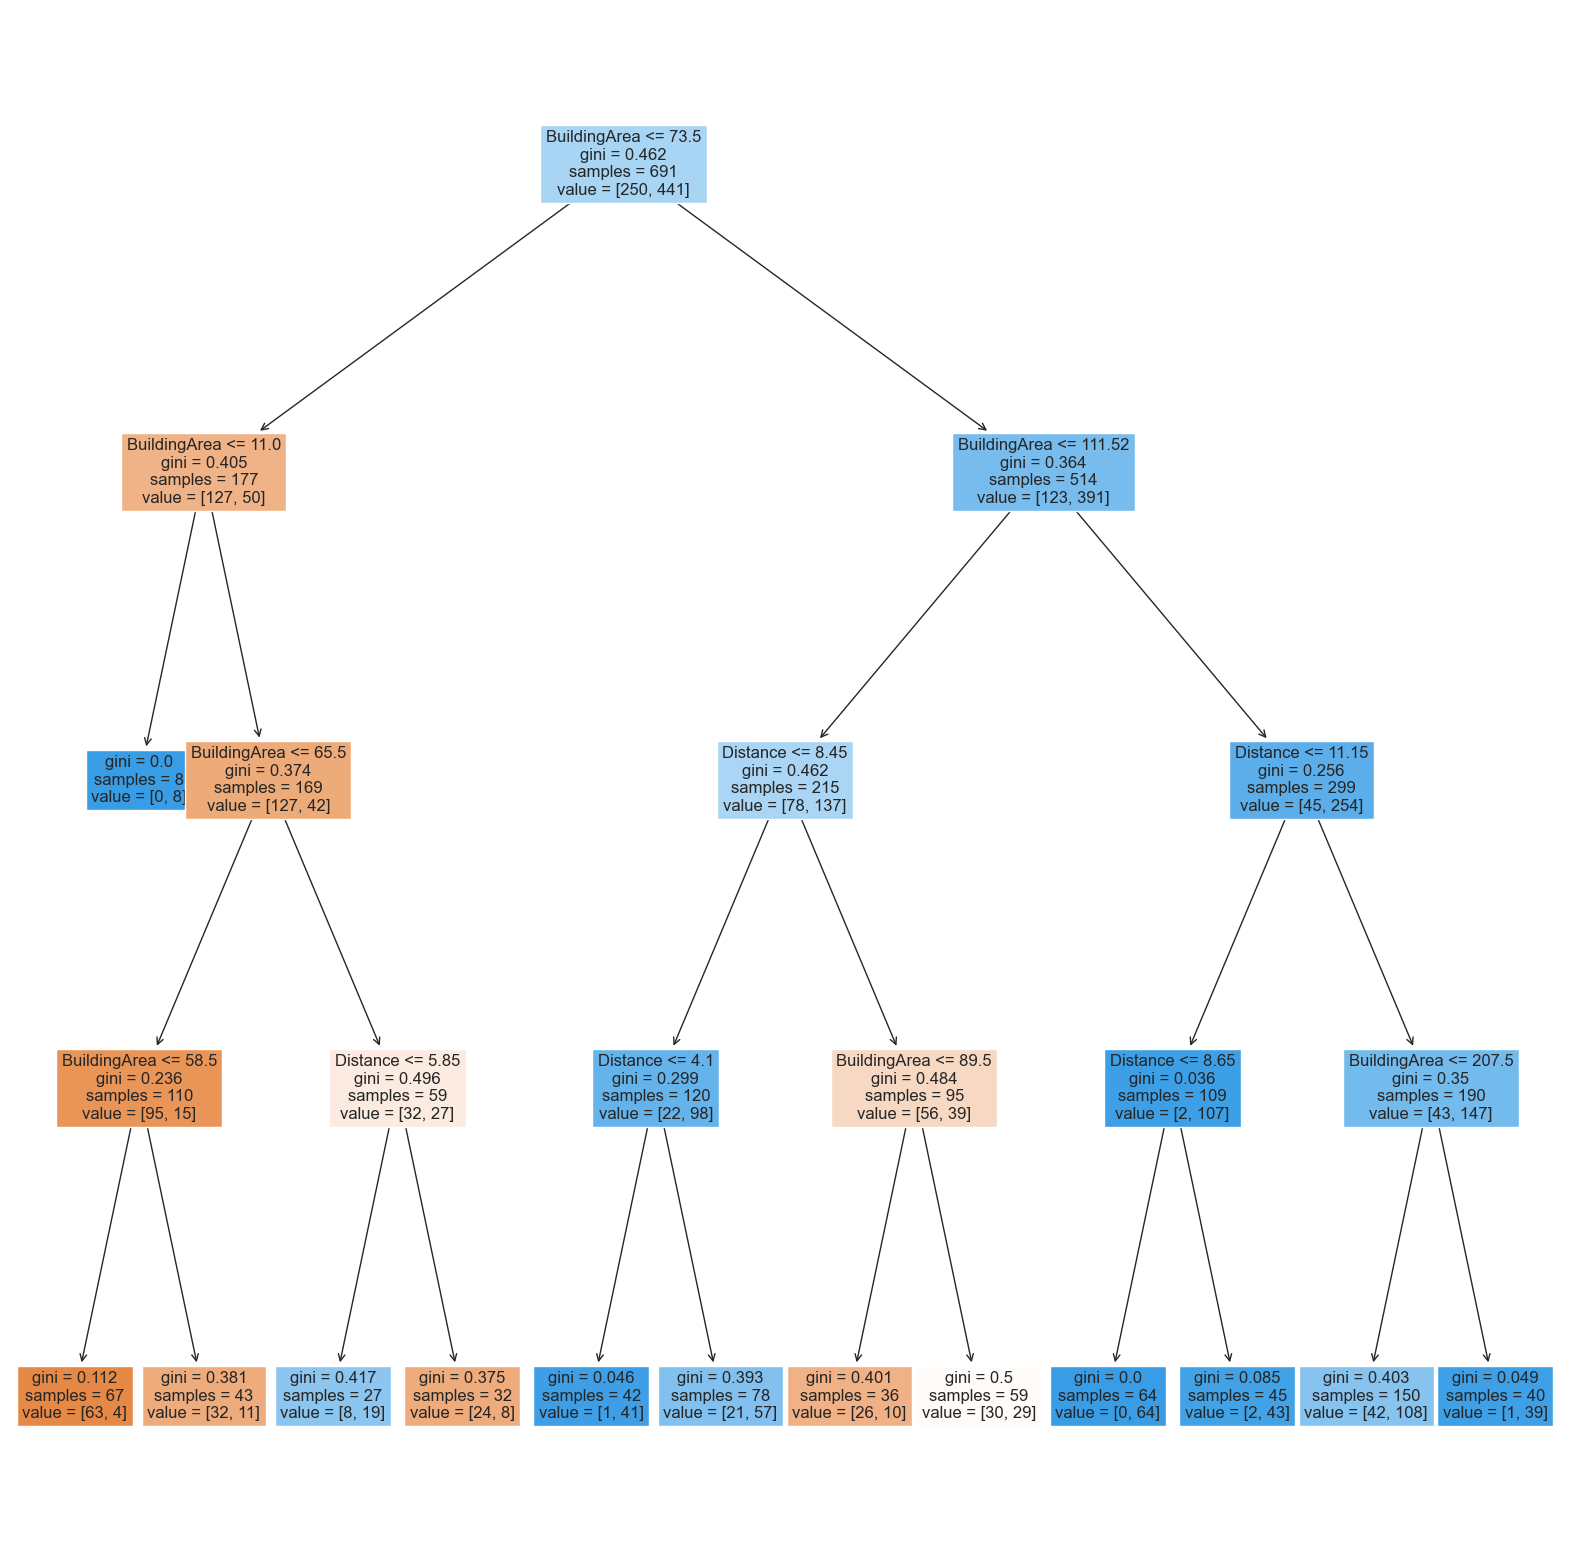

In [1962]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(20,20))
test = tree.plot_tree(dtc, 
                   feature_names=feature_names,  
                   filled=True,
                  fontsize=12)

In [1963]:
dtc.fit(X_train, y_train)
y_train_pred=dtc.predict(X_train)
y_test_pred=dtc.predict(X_test)

In [1964]:
prun = dtc.cost_complexity_pruning_path(X_train,y_train)
alphas=prun['ccp_alphas']
alphas

array([0.        , 0.00015106, 0.0029155 , 0.00295655, 0.00475925,
       0.00594333, 0.00867063, 0.00872486, 0.01147183, 0.01248502,
       0.02081416, 0.08714767])

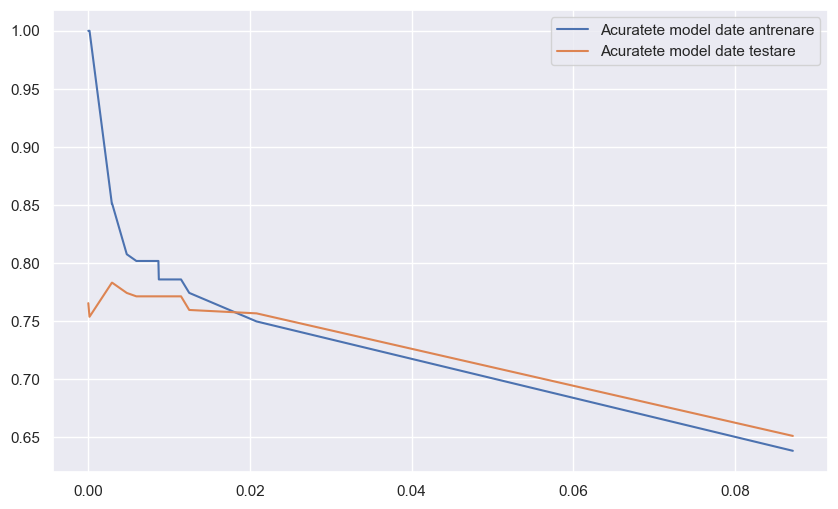

In [1965]:
train_accuracy=[] 
test_accuracy=[]

for alpha in alphas:
  dtc= DecisionTreeClassifier(ccp_alpha=alpha)

  dtc.fit(X_train,y_train)
  y_train_pred=dtc.predict(X_train)
  y_test_pred=dtc.predict(X_test)

  train_accuracy.append(accuracy_score(y_train, y_train_pred))
  test_accuracy.append(accuracy_score(y_test, y_test_pred))

sns.set()
plt.figure(figsize=(10,6))
sns.lineplot(y=train_accuracy, x=alphas, label='Acuratete model date antrenare')
sns.lineplot(y=test_accuracy, x=alphas, label='Acuratete model date testare')
plt.show()